In [1]:
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = fdr.DataReader('AAPL', '2018')[['Close']]
df.head()

,Close
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502


## Visualize

<AxesSubplot:xlabel='Date'>

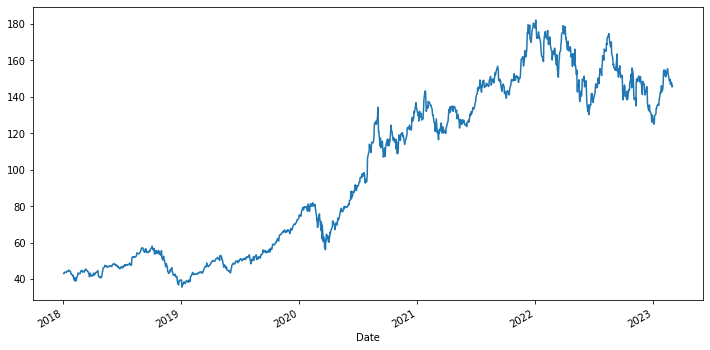

In [ ]:
df['Close'].plot(figsize = (12,6))

## train/test split

In [ ]:
df.head()

,Close
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502


In [ ]:
df.shape

(1300, 1)

In [ ]:
print(df.index.min())
print(df.index.max())

2018-01-02 00:00:00
2023-03-02 00:00:00


In [ ]:
test_size = 36
split_idx = len(df) - test_size

train = df.iloc[:split_idx]
test = df.iloc[split_idx:]
print(train.shape)
print(test.shape)

(1264, 1)
(36, 1)


## Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

Epoch 1/50
31/31 [==============================] - 12s 11ms/step - loss: 0.0363
Epoch 2/50
31/31 [==============================] - 0s 8ms/step - loss: 0.0017
Epoch 3/50
31/31 [==============================] - 0s 8ms/step - loss: 9.7513e-04
Epoch 4/50
31/31 [==============================] - 0s 8ms/step - loss: 9.6522e-04
Epoch 5/50
31/31 [==============================] - 0s 9ms/step - loss: 9.4930e-04
Epoch 6/50
31/31 [==============================] - 0s 8ms/step - loss: 8.8376e-04
Epoch 7/50
31/31 [==============================] - 0s 8ms/step - loss: 9.1532e-04
Epoch 8/50
31/31 [==============================] - 0s 8ms/step - loss: 8.5810e-04
Epoch 9/50
31/31 [==============================] - 0s 8ms/step - loss: 8.4342e-04
Epoch 10/50
31/31 [==============================] - 0s 8ms/step - loss: 7.7672e-04
Epoch 11/50
31/31 [==============================] - 0s 8ms/step - loss: 7.6392e-04
Epoch 12/50
31/31 [==============================] - 0s 8ms/step - loss: 7.0322e-04
Epoch 1

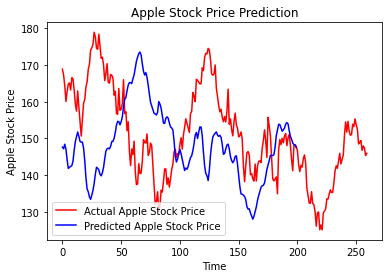

In [2]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Fetching the data using finance-datareader
df = fdr.DataReader('AAPL', '2018')[['Close']]

# Normalizing the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

# Splitting the data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size:, :]

# Creating the training data and labels
X_train = []
y_train = []
for i in range(60, train_size):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping the data for the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compiling and fitting the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Creating the testing data and labels
X_test = []
y_test = df.values[train_size:, :]
for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
X_test = np.array(X_test)

# Reshaping the data for the LSTM model
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Making predictions using the LSTM model
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

# Visualizing the results
import matplotlib.pyplot as plt
plt.plot(y_test, color='red', label='Actual Apple Stock Price')
plt.plot(predicted_prices, color='blue', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show()


- 예측값이 실제값보다 몇템포 느린감이 있다. 아무래도 데이터 기반으로 가격을 예측하다 보니 좀 늦는감이 있다. 그래도 예측선인 파란색 선을 전체적으로 왼쪽으로 옮기면 추세가 얼추 비슷하다. 
흠... 빠른건가.. 왼쪽이 아니라 오른쪽으로 갔을때가 비슷한듯...!